In [2]:
# Set the number of cores to use for parallelization
n_jobs = 4  # Specify the number of cores you want to use (e.g., 4)

# Random Forest Classifier with n_jobs set
rf = RandomForestClassifier(random_state=42, n_jobs=n_jobs)  # Specify n_jobs
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# k-Nearest Neighbors (k-NN) with n_jobs set
knn = KNeighborsClassifier(n_jobs=n_jobs)  # Specify n_jobs
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


In [3]:
import os

# Set the environment variable for joblib
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Set to the number of cores you want to use

# Proceed with the rest of your code


Missing values in the dataset: 0

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy: 0.9473684210526315

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99 

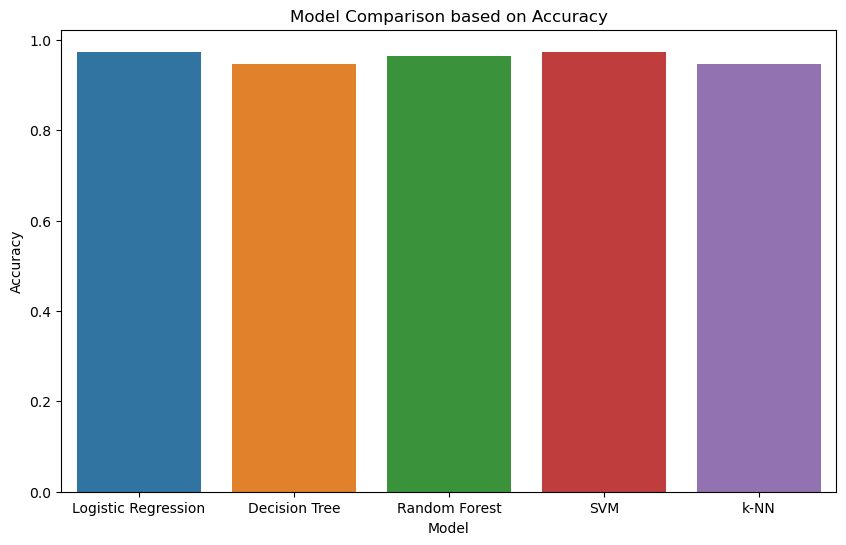


Best Model: Logistic Regression with Accuracy: 0.9736842105263158
Worst Model: Decision Tree with Accuracy: 0.9473684210526315


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import os

# Set the number of cores to use for parallelization
n_jobs = 4  # Specify the number of cores you want to use (e.g., 4)

# Optional: Set the LOKY_MAX_CPU_COUNT environment variable to avoid the warning
os.environ['LOKY_MAX_CPU_COUNT'] = str(n_jobs)

# 1. Loading and Preprocessing the Dataset
# Load the breast cancer dataset from sklearn
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels

# Preprocessing: Check for missing values
print("Missing values in the dataset:", np.sum(np.isnan(X)))

# Feature scaling: It's essential to scale the features because many algorithms (like SVM and k-NN) are sensitive to the scale of the features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Classification Algorithm Implementation

# Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_jobs=n_jobs)  # Set n_jobs to control the number of cores used
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier(n_jobs=n_jobs)  # Set n_jobs to control the number of cores used
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# 3. Model Comparison

# We will now evaluate the performance of each classifier using accuracy score and classification report.
print("\nLogistic Regression Performance:")
print(classification_report(y_test, logreg_pred))
print("Accuracy:", accuracy_score(y_test, logreg_pred))

print("\nDecision Tree Classifier Performance:")
print(classification_report(y_test, dt_pred))
print("Accuracy:", accuracy_score(y_test, dt_pred))

print("\nRandom Forest Classifier Performance:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

print("\nSupport Vector Machine (SVM) Performance:")
print(classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))

print("\nk-Nearest Neighbors (k-NN) Performance:")
print(classification_report(y_test, knn_pred))
print("Accuracy:", accuracy_score(y_test, knn_pred))

# Comparing the performance visually
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN']
accuracies = [
    accuracy_score(y_test, logreg_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, knn_pred)
]

# Convert accuracies list to a pandas Series to avoid the warning
accuracies_series = pd.Series(accuracies)

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies_series)  # Now passing a Series instead of a list
plt.title('Model Comparison based on Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# 4. Conclusion: Which model performed best and which worst?
best_model_idx = np.argmax(accuracies)
worst_model_idx = np.argmin(accuracies)

print("\nBest Model:", models[best_model_idx], "with Accuracy:", accuracies[best_model_idx])
print("Worst Model:", models[worst_model_idx], "with Accuracy:", accuracies[worst_model_idx])
